## SED stats & plots

- Read SYNAGE++ results
- Plot SED and models


In [1]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import aplpy
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatterExponent # <-- one new import here

FA_radeg = 50.673825
FA_decdeg = -37.208227

BeamRa = 51.199614
BeamDec = -37.617858
#rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'

figDir = rootDir+'contFigs/'



print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


	+---------+
	 Inputs loaded
	+---------+


In [2]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
def spIndex(a, b,outSpixPlot,title,BeamSize,contours):

    params = {'font.family'         :' serif',
              'font.serif'          :'times new roman',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 13.5,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 12,
              'ytick.labelsize'     : 12, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.major.size'    : 6,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 3,
              'xtick.minor.width'   : 1,
              'ytick.major.size'    : 6,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 3,
              'ytick.minor.width'   : 1, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    #fits.setval(a,'BMAJ',value=0.002777777777777778)
    #fits.setval(a,'BMIN',value=0.002777777777777778)
    #fits.setval(a,'BPA',value=0.0)        
    
    #plot image
    fig = plt.figure(figsize=(10, 10))

    #plot image
    f22 = fits.getdata(a, ext=0)
    img = plt.imshow(f22*-1, cmap="jet",vmin=0.2,vmax=1.4)
    plt.gca().set_visible(False)
    cax = plt.axes([0.905, 0.08, 0.015, 0.775])
    cbar = plt.colorbar(cax=cax)
    ax = cbar.ax
    ax.text(4.5,0.5,r'$\alpha$',rotation=90)
    cbar.set_tick_labels=([0.2,0.4,0.6,0.8,1.0,1.2,1.4])
    
    f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.12,0.08,0.775,0.775])
    f4.show_colorscale(aspect='equal', cmap='jet_r',vmax=-0.2,vmin=-1.4)
    f4.frame.set_linewidth(2)
    f4.recenter(FA_radeg,FA_decdeg,width=1.,height=1.)

    #f4.set_title('Break frequency map')

    f4.tick_labels.set_font( weight='book', size='small',
                             stretch='normal', family='serif', \
                             style='normal', variant='normal') 
    f4.axis_labels.set_font( weight='medium', size='medium',
                            stretch='semi-expanded', family='serif', \
                             style='normal', variant='normal')

    f4.tick_labels.set_xformat('hh:mm')

    f4.tick_labels.set_yformat('dd:mm')

    f4.axis_labels.set_xtext('RA (J2000)')
    f4.axis_labels.set_ytext('Dec (J2000)')

    f4.ticks.set_color('k')
    f4.ticks.set_length(6)  # points
    f4.ticks.set_linewidth(2)  # points
    f4.ticks.set_minor_frequency(3)
    f4.ticks.show()
    f4.set_title(title)
    f4.show_contour(b,levels=contours, colors='black',lw=1,ls='.')

    #f4.add_colorbar()
    #f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
    #f4.colorbar.set_ticks([-0.2,-0.4,-0.6,-0.8,-1.0,-1.2,-1.4,-1.6,-1.8])
    #f4.colorbar.set_frame_linewidth(1)
    #f4.colorbar.set_pad(0.2)
    #f4.colorbar.set_axis_label_font(size=24)
    #f4.colorbar.set_axis_label_text(r'$-\delta$')
    #f4.colorbar.set_font( weight='medium', \
    #                      stretch='semi-expanded', family='serif', \
    #                      style='normal', variant='normal',size=24)


    #
    #
    f4.show_ellipses(BeamRa, BeamDec, BeamSize/3600., BeamSize/3600., angle=0, edgecolor='black',linewidth=2)

    # beam
    #f4.add_beam()
    #f4.beam.show()
    #f4.beam.set_color('k')
    #f4.beam.set_frame(True)
    #f4.beam.set_major(10.0/3600.)
    #f4.beam.set_minor(10.0/3600.)
    #f4.beam.set_angle(0.0)    
    
    #fig.tight_layout()

    fig.savefig(outSpixPlot,dpi=300,transparent=True,format='pdf',bbox_inches='tight',overwrite=True)


    print '\n\t-----> Loaded <-----'

In [3]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
def spIndexReg(a, b,outSpixPlot,title,BeamSize,contours):

    params = {'font.family'         :' serif',
              'font.serif'          :'times new roman',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 13.5,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 12,
              'ytick.labelsize'     : 12, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.major.size'    : 6,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 3,
              'xtick.minor.width'   : 1,
              'ytick.major.size'    : 6,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 3,
              'ytick.minor.width'   : 1, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    
    fits.setval(a,'BMAJ',value=0.002777777777777778)
    fits.setval(a,'BMIN',value=0.002777777777777778)
    fits.setval(a,'BPA',value=0.0)    
    
    fig = plt.figure(figsize=(10, 10))

    #plot image
    f22 = fits.getdata(a, ext=0)
    img = plt.imshow(f22*-1., cmap="jet",vmin=0.2,vmax=1.4)
    plt.gca().set_visible(False)
    cax = plt.axes([0.905, 0.08, 0.015, 0.775])
    cbar = plt.colorbar(cax=cax)
    ax = cbar.ax
    ax.text(4.5,0.5,r'$\alpha$',rotation=90)
    cbar.set_tick_labels=([0.2,0.4,0.6,0.8,1.0,1.2,1.4])
    

    f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.12,0.08,0.775,0.775])
    f4.show_colorscale(aspect='equal', cmap='jet_r',vmax=-0.2,vmin=-1.4)
    f4.frame.set_linewidth(2)
    f4.recenter(FA_radeg,FA_decdeg,width=1.,height=1.)

    #f4.set_title('Break frequency map')

    f4.tick_labels.set_font( weight='book', size='small',
                             stretch='normal', family='serif', \
                             style='normal', variant='normal') 
    f4.axis_labels.set_font( weight='medium',size='medium',
                            stretch='semi-expanded', family='serif', \
                             style='normal', variant='normal')

    f4.tick_labels.set_xformat('hh:mm')

    f4.tick_labels.set_yformat('dd:mm')

    f4.axis_labels.set_xtext('RA (J2000)')
    f4.axis_labels.set_ytext('Dec (J2000)')

    f4.ticks.set_color('k')
    f4.ticks.set_length(9)  # points
    f4.ticks.set_linewidth(3)  # points
    f4.ticks.set_minor_frequency(3)
    f4.ticks.show()
    f4.set_title(title)
    f4.show_contour(b,levels=contours, colors='black',lw=1,ls='.')

    #f4.add_colorbar()
    #f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
    #f4.colorbar.set_ticks([-0.2,-0.4,-0.6,-0.8,-1.0,-1.2,-1.4,-1.6,-1.8])
    #f4.colorbar.set_frame_linewidth(1)
    #f4.colorbar.set_pad(0.2)
    #f4.colorbar.set_axis_label_font(size=24)
    #f4.colorbar.set_axis_label_text(r'-$\delta$')
    #f4.colorbar.set_font( weight='medium', \
    #                      stretch='semi-expanded', family='serif', \
    #                      style='normal', variant='normal',size=24)

    f4.show_regions(rootDir+'inIms/regions/diff_regions/Enorth.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Ehot.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Ejet.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Esouth.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Ecentre.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/bridge.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Wcentre.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Wcentre2.reg')

    f4.show_regions(rootDir+'inIms/regions/diff_regions/Wjet.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Whot.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Wnorth.reg')
    f4.show_regions(rootDir+'inIms/regions/diff_regions/Wsouth.reg')

    #f4.show_ellipses(BeamRa, BeamDec, BeamSize/3600., BeamSize/3600., angle=0, edgecolor='black',linewidth=2)
    # beam
    #f4.add_beam()
    #f4.beam.show()
    #f4.beam.set_color('k')
    #f4.beam.set_frame(True)
    #f4.beam.set_major(10.0/3600.)
    #f4.beam.set_minor(10.0/3600.)
    #f4.beam.set_angle(0.0)    
    
    #fig.tight_layout()

    fig.savefig(outSpixPlot,dpi=300,transparent=False,format='pdf',overwrite=True)


    print '\n\t-----> Loaded <-----'

/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:
/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw', 'ls'
  s)



	-----> Loaded <-----

	-----> Loaded <-----


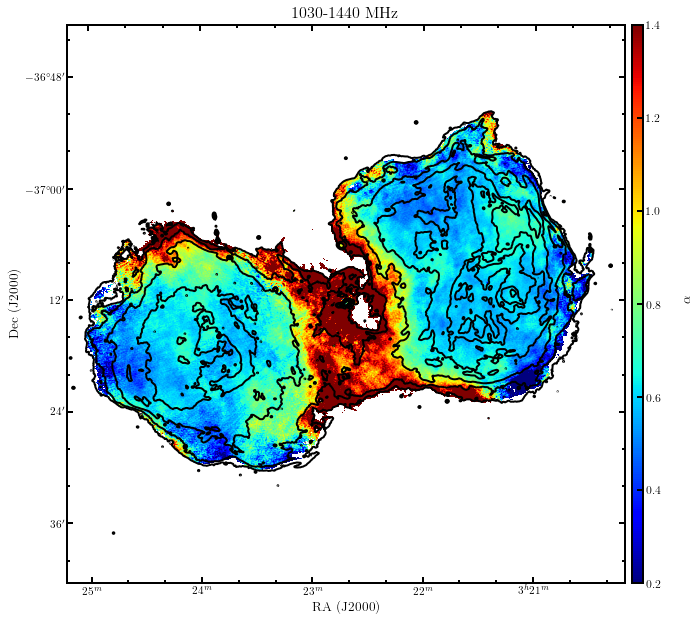

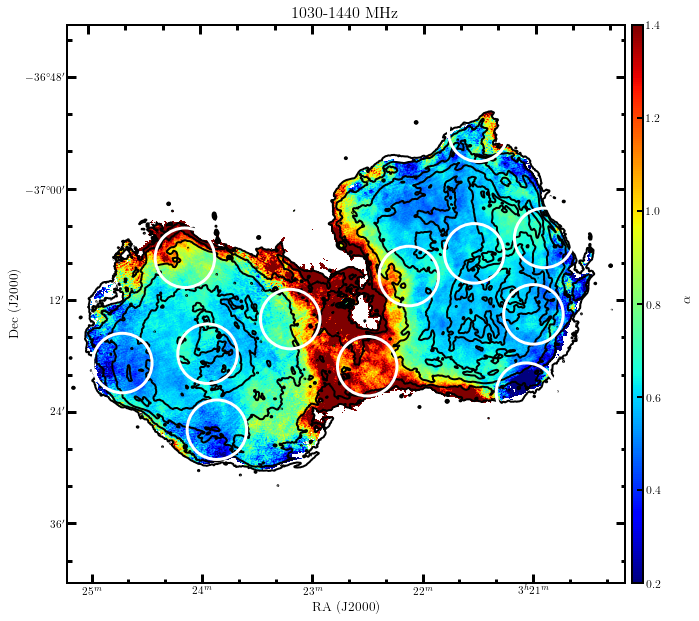

In [4]:
spixMap = rootDir+'synMaps/spIxMaps/Spix_1030-1440MHz_beam_mult_maskCut.fits'
outSpixPlot = figDir+'Spix_1030-1440MHz_beamTmp.pdf'
contMap = rootDir+'inIms/CONVL/CONVLMB_Meer_1440MHz_div_bt32_maskCut.fits'
contours = [4e-4,8e-4,2e-3,4.5e-3,7.5e-3,1.e-2]
spIndex(spixMap,contMap,outSpixPlot,'1030-1440 MHz',10.,contours)

outSpixPlot = figDir+'Spix_1030-1440MHzReg_beamTmp.pdf'

spIndexReg(spixMap,contMap,outSpixPlot,'1030-1440 MHz',10.,contours)


	-----> Loaded <-----

	-----> Loaded <-----

	-----> Loaded <-----


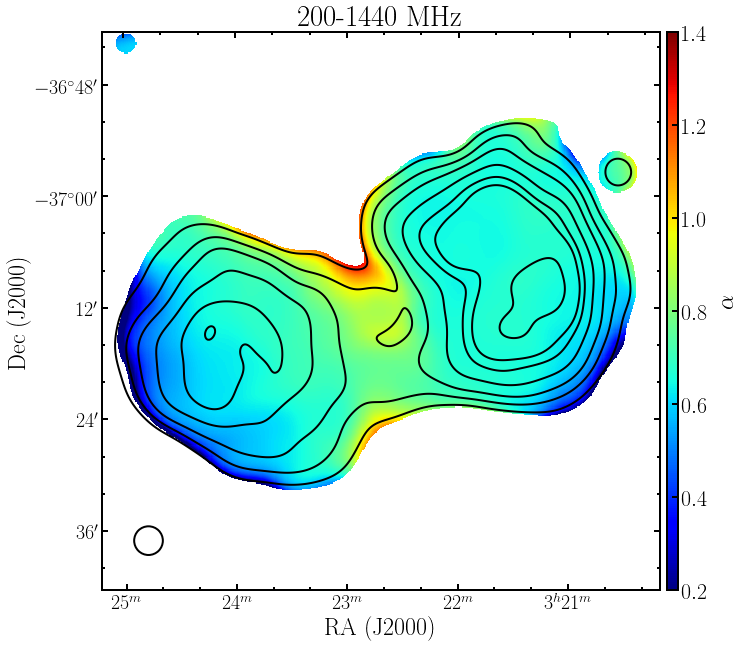

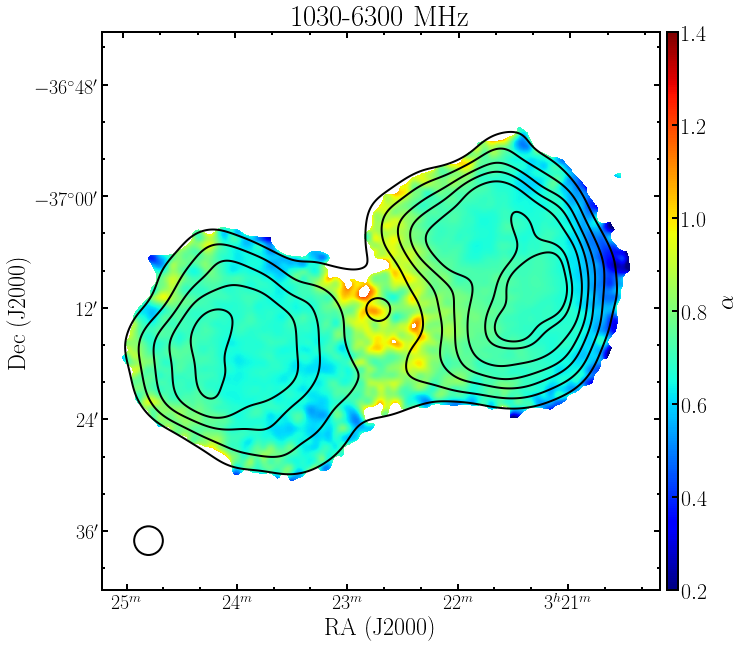

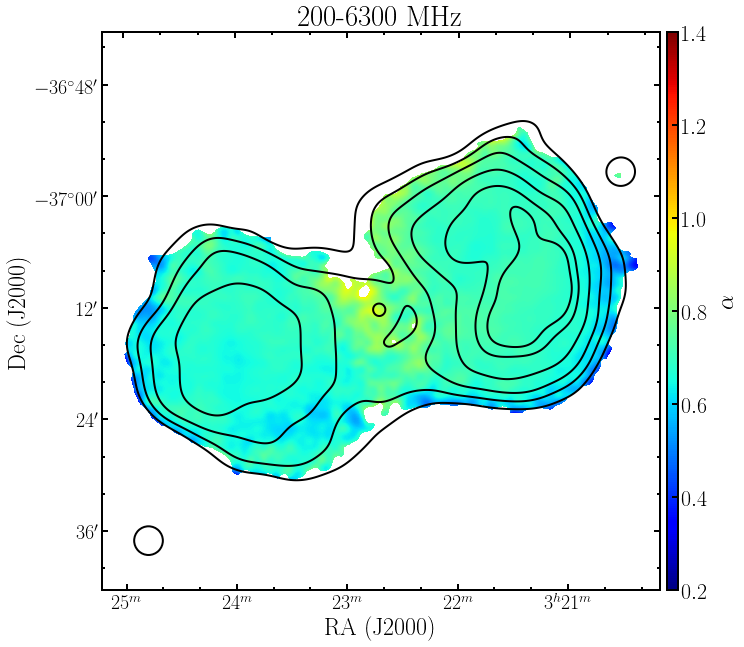

In [5]:
#spixMap = rootDir+'synMaps/spIxMaps/Spix_200-1030MHz_mult.fits'
#outSpixPlot = figDir+'Spix_200-1030MHzTmp.pdf'
#contMap = rootDir+'inIms/CONVL/CONVLS_Meer_1030MHz_div_bt32.fits'
#contours = [0.1,0.25,0.5,1.,2.,3.]

#spIndex(spixMap,contMap,outSpixPlot,'200-1030MHz',185.,contours)

spixMap = rootDir+'synMaps/spIxMaps/Spix_200-1440MHz_mult.fits'
outSpixPlot = figDir+'Spix_200-1440MHzTmp.pdf'
contMap = rootDir+'inIms/CONVL/CONVLSS_Meer_1440MHz_div_bt32.fits'
contours = [0.1,0.25,0.5,1.,1.6,2.,3.,3.5]

spIndex(spixMap,contMap,outSpixPlot,'200-1440 MHz',185.,contours)

#spixMap = rootDir+'synMaps/spIxMaps/Spix_200-1500MHz_mult.fits'
#outSpixPlot = figDir+'Spix_200-1500MHzTmp.pdf'
#contMap = rootDir+'inIms/CONVL/CONVLS_VLA_1500MHz_bt32.fits'
contours = [0.26,0.6,1.1,1.6,2.2,3.1,3.5]

#spIndex(spixMap,contMap,outSpixPlot,'200-1500MHz',185.,contours)


spixMap = rootDir+'synMaps/spIxMaps/Spix_1030-6300MHz_VLAgrid_mult.fits'
contMap = rootDir+'inIms/CONVL/CONVLSS_SRT_6300MHz_bt32_corr.fits'
contMap = rootDir+'inIms/CONVL/CONVLSS_Meer_1030MHz_div_bt32.fits'

#contours = [0.05,0.1,0.2,0.4,0.58,0.7,0.8]

outSpixPlot = figDir+'Spix_1030-6300MHzTmp.pdf'

spIndex(spixMap,contMap,outSpixPlot,'1030-6300 MHz',185.,contours)


#spixMap = rootDir+'synMaps/spIxMaps/Spix_1440-6300MHz_VLAgrid_mult.fits'

#outSpixPlot = figDir+'Spix_1440-6300MHzTmp.pdf'
#spIndex(spixMap,contMap,outSpixPlot,'1440-6300MHz',185.,contours)



#spixMap = rootDir+'synMaps/spIxMaps/Spix_1500-6300MHz_mult.fits'
#outSpixPlot = figDir+'Spix_1500-6300MHzTmp.pdf'
#spIndex(spixMap,contMap,outSpixPlot,'1500-6300MHz',185.,contours)


spixMap = rootDir+'synMaps/spIxMaps/Spix_200-6300MHz_mult.fits'
outSpixPlot = figDir+'Spix_200-6300MHzTmp.pdf'
contMap = rootDir+'inIms/CONVL/CONVLSS_MWA_200MHz_bt32_corr.fits'
contours = [0.1,0.25,0.5,1.,1.6,2.,3.,3.5]
contours = [0.5,1.2,2.4,4.8,8.,10]

spIndex(spixMap,contMap,outSpixPlot,'200-6300 MHz',185.,contours)




In [6]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
def spIndexZoom(a, b,outSpixPlot,title,BeamSize,contours):

    params = {'font.family'         :' serif',
              'font.serif'          :'times new roman',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 24,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 22,
              'ytick.labelsize'     : 22, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.major.size'    : 6,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 3,
              'xtick.minor.width'   : 1,
              'ytick.major.size'    : 6,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 3,
              'ytick.minor.width'   : 1, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    #plot image    

    fig = plt.figure(figsize=(10, 10))

    f22 = fits.getdata(a, ext=0)
    img = plt.imshow(f22*-1, cmap="jet",vmin=0.2,vmax=1.4)
    plt.gca().set_visible(False)
    cax = plt.axes([0.905, 0.08, 0.015, 0.775])
    cbar = plt.colorbar(cax=cax)
    ax = cbar.ax
    ax.text(4.5,0.5,r'$\alpha$',rotation=90)
    

    f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.12,0.08,0.775,0.775])


    f4.show_colorscale(aspect='equal', cmap='jet_r',vmax=-0.2,vmin=-1.4)
    f4.frame.set_linewidth(2)
    f4.recenter(FA_radeg,FA_decdeg,width=140./3600.,height=135./3600.)

    #f4.set_title('Break frequency map')

    f4.tick_labels.set_font( weight='book', size='small',
                             stretch='normal', family='serif', \
                             style='normal', variant='normal') 
    f4.axis_labels.set_font( weight='medium', size='medium',
                            stretch='semi-expanded', family='serif', \
                             style='normal', variant='normal')
 
    f4.set_title(title)
    f4.show_contour(b,levels=contours, colors='black',lw=1,ls='.')

    
    
    f4.tick_labels.set_xformat('hh:mm:ss')

    f4.tick_labels.set_yformat('dd:mm')

    f4.axis_labels.set_xtext('RA (J2000)')
    f4.axis_labels.set_ytext('Dec (J2000)')

    f4.ticks.set_color('k')
    f4.ticks.set_length(6)  # points
    f4.ticks.set_linewidth(2)  # points
    f4.ticks.set_minor_frequency(3)
    f4.ticks.show()


    #f4.add_colorbar()
    #f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
    #f4.colorbar.set_ticks([-0.2,-0.4,-0.6,-0.8,-1.0,-1.2,-1.4,-1.6,-1.8])
    #f4.colorbar.set_frame_linewidth(1)
    #f4.colorbar.set_pad(0.2)
    #f4.colorbar.set_axis_label_font(size=24)
    #f4.colorbar.set_axis_label_text(r'$\delta$')
    #f4.colorbar.set_font( weight='medium', \
    #                     stretch='semi-expanded', family='serif', \
    #                      style='normal', variant='normal',size=24)


    f4.show_ellipses(BeamRaCtr, BeamDecCtr, BeamSize/3600., BeamSize/3600., angle=0, edgecolor='black',linewidth=2)

    #fig.tight_layout()

    fig.savefig(outSpixPlot,dpi=300,transparent=False,format='pdf',bbox_inches='tight',overwrite=True)


    print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


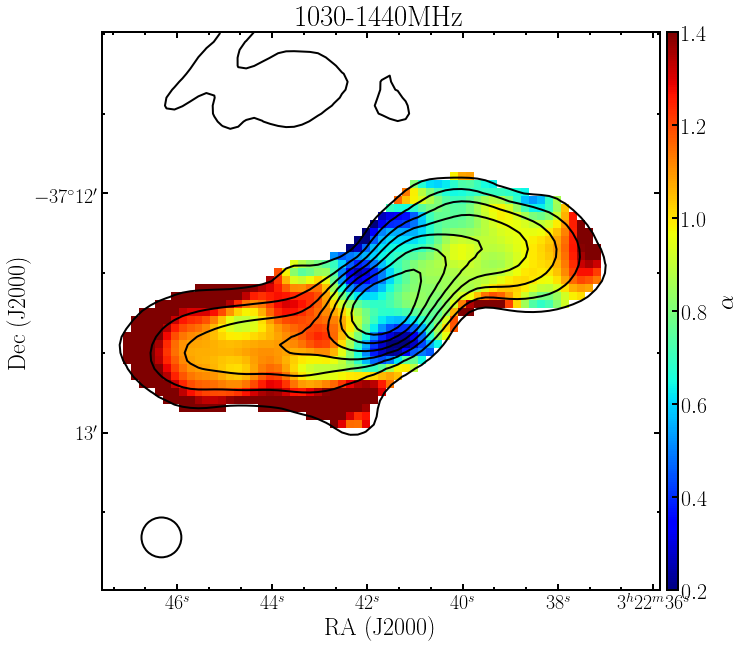

In [7]:
FA_radeg = 50.673825
FA_decdeg = -37.208227
BeamRaCtr = 50.693035
BeamDecCtr = -37.223974

spixMap = rootDir+'synMaps/spIxMaps/Spix_1030-1440MHz_Ctr_mult.fits'
outSpixPlot = figDir+'Spix_1030-1440MHzCtrBeamTmp.pdf'
contMap = rootDir+'inIms/CONVL/CONVLMB_Meer_1440MHz_div_bt32_maskCut.fits'
contours = [8e-4,1.5e-3,3.0e-3,6.0e-3,1.2e-2,2.4e-2,4.8e-2]
spIndexZoom(spixMap,contMap,outSpixPlot,'1030-1440MHz',10.,contours)

In [8]:
def breakMap(a, b,outSpixPlot,title,BeamSize,contours):

    params = {'font.family'         :' serif',
              'font.serif'          :'times new roman',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 13.5,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 12,
              'ytick.labelsize'     : 12, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.major.size'    : 6,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 3,
              'xtick.minor.width'   : 1,
              'ytick.major.size'    : 6,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 3,
              'ytick.minor.width'   : 1, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    #plot image

    fig = plt.figure(figsize=(10, 10))

    f22 = fits.getdata(a, ext=0)
    img = plt.imshow(f22, cmap="jet_r",vmin=1,vmax=300)
    plt.gca().set_visible(False)
    cax = plt.axes([0.91, 0.1, 0.015, 0.8])
    cbar = plt.colorbar(cax=cax)
    ax = cbar.ax
    ax.text(4.5,0.5,r'$\nu_{\rm break}$ [GHz]',rotation=90)
    

    f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.1,0.1,0.8,0.8])
    f4.set_theme('publication')
    
    f4.show_colorscale(aspect='equal', cmap='jet_r',stretch='log',vmax=3e2,vmid=1e-1,vmin=1)
    f4.frame.set_linewidth(2)
    f4.recenter(FA_radeg,FA_decdeg,width=1.,height=1.)

    #f4.set_title('Break frequency map')

    f4.tick_labels.set_font( weight='book', size='small',
                             stretch='normal', family='serif', \
                             style='normal', variant='normal') 
    f4.axis_labels.set_font( weight='medium', size='medium',
                            stretch='semi-expanded', family='serif', \
                             style='normal', variant='normal')

    f4.tick_labels.set_xformat('hh:mm')

    f4.tick_labels.set_yformat('dd:mm')

    f4.axis_labels.set_xtext('RA (J2000)')
    f4.axis_labels.set_ytext('Dec (J2000)')

    f4.ticks.set_color('k')
    f4.ticks.set_length(6)  # points
    f4.ticks.set_linewidth(2)  # points
    f4.ticks.set_minor_frequency(3)
    f4.ticks.show()
    f4.set_title(title)
    f4.show_contour(b,levels=contours, colors='black',lw=1,ls='.')

    #f4.add_colorbar()
    #f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
    #f4.colorbar.formatter = LogFormatterExponent(base=10) # 10 is the default
    #f4.colorbar.set_ticks([1,10,50,100,300])
    #f4.colorbar.set_tick_labels(['1','10','100'])

    #f4.colorbar.set_frame_linewidth(1)
    #f4.colorbar.set_pad(0.2)
    #f4.colorbar.set_axis_label_font(size=24)
    #f4.colorbar.set_axis_label_text(r'$\nu_{\rm break}$ [GHz]')
    #f4.colorbar.set_font( weight='medium', \
    #                      stretch='semi-expanded', family='serif', \
    #                      style='normal', variant='normal',size=24)
    #f4.colorbar.formatter = LogFormatterExponent(base=10) # 10 is the default
    #f4.colorbar.update_ticks()

    #f4.show_ellipses(BeamRa, BeamDec, BeamSize/3600., BeamSize/3600., angle=0, edgecolor='black',linewidth=2)

    #fig.tight_layout(rect=[0.2,0.2,0.8,0.8])

    fig.savefig(outSpixPlot,dpi=300,transparent=False,format='pdf',bbox_inches='tight',overwrite=True)

    print '\n\t-----> Loaded <-----'

def breakMapZoom(a, b,outSpixPlot,title,BeamSize,contours):

    params = {'font.family'         :' serif',
              'font.serif'          :'times new roman',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 24,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 22,
              'ytick.labelsize'     : 22, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.major.size'    : 6,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 3,
              'xtick.minor.width'   : 1,
              'ytick.major.size'    : 6,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 3,
              'ytick.minor.width'   : 1, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    #plot image

    fig = plt.figure(figsize=(10, 10))

    f22 = fits.getdata(a, ext=0)
    img = plt.imshow(f22, cmap="jet_r",vmin=1,vmax=300)
    plt.gca().set_visible(False)
    cax = plt.axes([0.912, 0.1, 0.015, 0.8])
    cbar = plt.colorbar(cax=cax)
    ax = cbar.ax
    ax.text(5.0,0.5,r'$\nu_{\rm break}$ [GHz]',rotation=90)
    
    
    f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.1,0.1,0.8,0.8])
    f4.show_colorscale(aspect='equal', cmap='jet_r',stretch='log',vmax=3e2,vmid=1e-1,vmin=1)
    f4.frame.set_linewidth(2)
    f4.recenter(FA_radeg,FA_decdeg,width=140./3600.,height=135./3600.)

    #f4.set_title('Break frequency map')

    f4.tick_labels.set_font( weight='book', size='small',
                             stretch='normal', family='serif', \
                             style='normal', variant='normal') 
    f4.axis_labels.set_font( weight='medium', size='medium',
                            stretch='semi-expanded', family='serif', \
                             style='normal', variant='normal')

    f4.tick_labels.set_xformat('hh:mm:ss')
    f4.tick_labels.set_yformat('dd:mm')

    f4.axis_labels.set_xtext('RA (J2000)')
    f4.axis_labels.set_ytext('Dec (J2000)')

    f4.ticks.set_color('k')
    f4.ticks.set_length(6)  # points
    f4.ticks.set_linewidth(2)  # points
    f4.ticks.set_minor_frequency(3)
    f4.ticks.show()
    f4.set_title(title)
    f4.show_contour(b,levels=contours, colors='black',lw=1,ls='.')

    #f4.add_colorbar()
    #f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
    #f4.colorbar.formatter = LogFormatterExponent(base=10) # 10 is the default
    #f4.colorbar.set_ticks([1,10,50,100,300])
    #f4.colorbar.set_tick_labels(['1','10','100'])

    #f4.colorbar.set_frame_linewidth(1)
    #f4.colorbar.set_pad(0.2)
    #f4.colorbar.set_axis_label_font(size=24)
    #f4.colorbar.set_axis_label_text(r'$\nu_{\rm break}$ [GHz]')
    #f4.colorbar.set_font( weight='medium', \
    #                      stretch='semi-expanded', family='serif', \
    #                      style='normal', variant='normal',size=24)
    #f4.colorbar.formatter = LogFormatterExponent(base=10) # 10 is the default
    #f4.colorbar.update_ticks()

    f4.show_ellipses(BeamRaCtr, BeamDecCtr, BeamSize/3600., BeamSize/3600., angle=0, edgecolor='black',linewidth=2)

    #fig.tight_layout(rect=[0.08,0.08,0.92,0.92])

    fig.savefig(outSpixPlot,dpi=300,transparent=False,format='pdf',bbox_inches='tight',overwrite=True)


    print '\n\t-----> Loaded <-----'


	-----> Loaded <-----

	-----> Loaded <-----


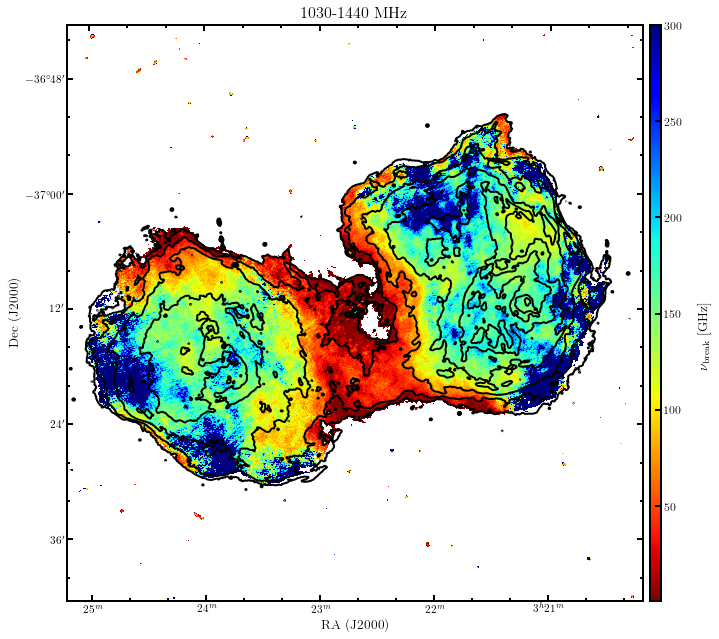

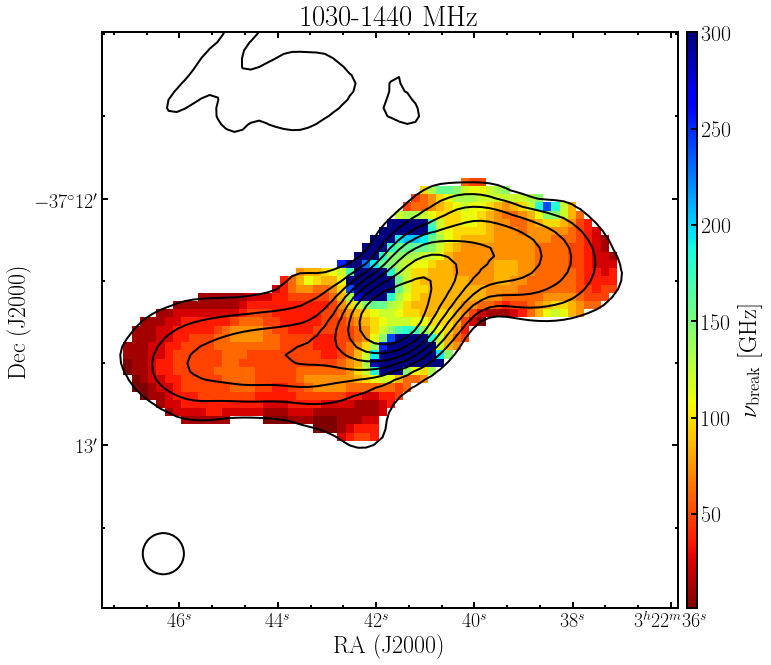

In [9]:
spixMap = rootDir+'synMaps/breakMaps/JPBREAK_BREAK.FITS_mult_maskCut.fits'
outSpixPlot = figDir+'BreakMapTmp.pdf'
contMap = rootDir+'inIms/CONVL/CONVLMB_Meer_1440MHz_div_bt32_maskCut.fits'
contours = [4e-4,8e-4,2e-3,4.5e-3,7.5e-3,1.e-2]
breakMap(spixMap,contMap,outSpixPlot,'1030-1440 MHz',10.,contours)

#outSpixPlot = figDir+'Spix_1030-1440MHzReg_beam.png'
spixMap = rootDir+'synMaps/breakMaps/JPBREAK_BREAK_core_mult.fits'
outSpixPlot = figDir+'BreakMap_coreTmp.pdf'
contMap = rootDir+'inIms/CONVL/CONVLMB_Meer_1440MHz_div_bt32_maskCut.fits'
contours = [8e-4,1.5e-3,3.0e-3,6.0e-3,1.2e-2,2.4e-2,4.8e-2]
breakMapZoom(spixMap,contMap,outSpixPlot,'1030-1440 MHz',10.,contours)

#spIndexReg(spixMap,contMap,outSpixPlot,'1030-1440MHz',10.,contours)